<a href="https://colab.research.google.com/github/naufalihsan/tesseract/blob/master/Hyperparameter_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import files

uploaded = files.upload()

Saving dw_customer_5000.csv to dw_customer_5000.csv


In [0]:
df = pd.read_csv('dw_customer_5000.csv', delimiter='|')

In [0]:
df = df.dropna()
df = df.drop(columns=['ic_number'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4987 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_name   4987 non-null   object
 1   address         4987 non-null   object
 2   place_of_birth  4987 non-null   object
 3   birth_date      4987 non-null   object
 4   gender          4987 non-null   object
dtypes: object(5)
memory usage: 233.8+ KB


In [8]:
df.head()

,customer_name,address,place_of_birth,birth_date,gender
0,Nur Sholihin,Desa Mencon Rt 05 Rw 02 kecamatan Pucakwangi k...,pati,2001-06-20 00:00:00,M
1,operius waruwu,JL.JATI GG KELUARGA KOMPLEK ZIPUR,SIHAREO III,1991-08-02 00:00:00,M
2,Fika Ahsan Nugroho,"Dsn.Blaring , 004/002 , Ds.Panggungsari , Dure...",Tulungagung,1997-10-29 00:00:00,M
3,ikhsan fuzan nasrullah,Jln Moch Ramdhan no 28 kec Ciparay,Bandung,1994-07-25 00:00:00,M
4,sarbini,"desa pulau ku,u",tabalong,1992-12-30 00:00:00,M


In [0]:
name = df.customer_name

In [0]:
def clean_name(name):
  return name.lower()

In [0]:
name = name.apply(clean_name)

In [0]:
nf = { 'entity': name, 'category': 'nama' } 
df1 = pd.DataFrame(nf) 

In [0]:
rnf = pd.DataFrame({ 'entity': ['annisa febriyanti','vivin putri'], 'category': ['nama','nama'] } ) 
df1 = df1.append(rnf,ignore_index=True)

In [0]:
address = df.address

In [0]:
import re

def clean_address(addr):
  return re.sub('[^A-Za-z]+', ' ', addr).lower()

In [0]:
address = address.apply(clean_address)

In [0]:
af = { 'entity': address, 'category': 'alamat' } 
df2 = pd.DataFrame(af) 

In [0]:
birthday = df.place_of_birth + ' ' + df.birth_date

In [0]:
def clean_birthday(birth):
  ttl = birth.strip().split(" ")
  ttl[0] = ttl[0].lower()
  ttl[-2] = rearrange_birthday(ttl[-2])
  return ' '.join(ttl[:-1])

def rearrange_birthday(date):
  dates = date.split("-")
  return f'{dates[2]} {dates[1]} {dates[0]}'

In [0]:
birthday = birthday.apply(clean_birthday)

In [0]:
bf = { 'entity': birthday, 'category': 'ttl' } 
df3 = pd.DataFrame(bf) 

In [0]:
# icf = { 'entity': df.ic_number, 'category': 'nik' }
# df4 = pd.DataFrame(icf)

In [0]:
gender = df.gender

In [0]:
import random

def clean_gender(gender):
  m_list = ['pria','laki laki']
  f_list = ['wanita','perempuan']
  if gender == 'M':
    return random.choice(m_list)
  return random.choice(f_list)

In [0]:
gender = gender.apply(clean_gender)

In [0]:
gf = { 'entity': gender, 'category': 'gender' } 
df5 = pd.DataFrame(gf)

In [27]:
display(df1.tail())
display(df2.head())
display(df3.head())
# display(df4.head())
display(df5.head())

,entity,category
4984,agus susanto,nama
4985,rb bambang bandoro,nama
4986,i ketut seridata,nama
4987,annisa febriyanti,nama
4988,vivin putri,nama


,entity,category
0,desa mencon rt rw kecamatan pucakwangi kabupat...,alamat
1,jl jati gg keluarga komplek zipur,alamat
2,dsn blaring ds panggungsari durenan trenggalek,alamat
3,jln moch ramdhan no kec ciparay,alamat
4,desa pulau ku u,alamat


,entity,category
0,pati 20 06 2001,ttl
1,sihareo III 02 08 1991,ttl
2,tulungagung 29 10 1997,ttl
3,bandung 25 07 1994,ttl
4,tabalong 30 12 1992,ttl


,entity,category
0,laki laki,gender
1,laki laki,gender
2,laki laki,gender
3,pria,gender
4,laki laki,gender


In [0]:
# .append(df4, ignore_index=True)
df1 = df1.append(df2, ignore_index=True).append(df3, ignore_index=True).append(df5, ignore_index=True)

DOWNLOAD CLEAN DATA

In [106]:
a = df1.query("category=='alamat'").category.str.extract('(\d+)')
a.isnull()

,0
4989,True
4990,True
4991,True
4992,True
4993,True
...,...
9971,True
9972,True
9973,True
9974,True


In [0]:
# df1.to_csv('train_doku2.csv')
# files.download('train_doku2.csv')

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19950 entries, 0 to 19949
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   entity    19950 non-null  object
 1   category  19950 non-null  object
dtypes: object(2)
memory usage: 311.8+ KB


In [0]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = encoder.fit_transform(df1.category)

In [0]:
X = df1.entity
y = target

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_train_dtm = count_vect.fit_transform(X_train)
X_train_dtm

<13965x9278 sparse matrix of type '<class 'numpy.int64'>'
	with 46934 stored elements in Compressed Sparse Row format>

In [0]:
X_test_dtm = count_vect.transform(X_test)

In [0]:
X_test_dtm

<5985x9278 sparse matrix of type '<class 'numpy.int64'>'
	with 17483 stored elements in Compressed Sparse Row format>

In [0]:
code = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
code

{0: 'alamat', 1: 'gender', 2: 'nama', 3: 'ttl'}

In [0]:
def evaluation_test(predicts):
  for types, category in zip(predict_words, predicts):
    print(f'{types} => {code[category]}')

In [0]:
predict_words = ['naufal ihsan pratama','jl juraganan rt 01 no 25','laki laki','vivin febriyanti strk']
# preds = count_vect.transform(predict_words)

In [0]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_dtm, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
mnb_preds = mnb.predict(preds)
evaluation_test(mnb_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
vivin febriyanti strk => nama


In [0]:
print(f'MultinomialNB Score => {mnb.score(X_test_dtm, y_test)}')

MultinomialNB Score => 0.9333333333333333


Text(0.5, 1.0, 'Confusion Matrix MultinomialNB')

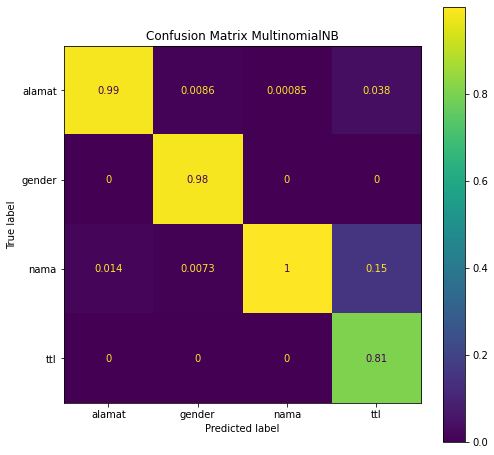

In [0]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib as plt

mnb_disp = plot_confusion_matrix(mnb, X_test_dtm, y_test,
                                 display_labels= encoder.classes_,
                                 cmap=plt.cm.viridis,normalize='pred')
mnb_disp.figure_.set_size_inches(8,8)
mnb_disp.ax_.set_title('Confusion Matrix MultinomialNB')

In [0]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_class = mnb.predict(X_test_dtm)
# print(f'accuracy => {accuracy_score(y_test, y_pred_class)}')

target_names = ['alamat','gender', 'nama','ttl']
print(classification_report(y_test, y_pred_class, target_names=target_names))

              precision    recall  f1-score   support

      alamat       0.99      0.95      0.97      1520
      gender       0.98      1.00      0.99      1486
        nama       1.00      0.79      0.88      1497
         ttl       0.81      1.00      0.89      1482

    accuracy                           0.93      5985
   macro avg       0.94      0.93      0.93      5985
weighted avg       0.94      0.93      0.93      5985



In [0]:
X_test[y_pred_class > y_test]

8557            menganti rawalo banyumas
1904                              ridani
1402                             subandi
4067                    jovitha andarini
1434                        aang sobirin
                      ...               
1589                        stevani nory
4210    rachel ravensca marisca loupatty
2483                     salman alfarisi
9211                           simokerto
4159                            matganti
Name: entity, Length: 367, dtype: object

In [0]:
X_test[y_pred_class < y_test]

2630                   hasanudin
1690               mayang savira
3441              indah dekawati
3258        indah lestariningsih
3087                  abdi karya
3203        yunita indah pramasa
4746                  ing dihana
234              i gede widiarta
3872              vina budiyanti
230           affan deska sayuti
335        opsidian izzuda buana
2037                peggy melati
797                  oki nuryana
2649                 mayang sari
609                    ulin nuha
938                 ulfa jayanti
670       sintong taripar sihite
2624          dessy pramita sari
586            rosky kumala sari
2323    jieliwosy silas salawati
2746             siprianus jumat
4494                 saka apreja
1722               oki lazzwardi
3195               indah lestari
3162                tamara digma
2170              rahmianti sari
4564             sindu mutusolah
4943      teddi kaharuddin saleh
111              hediati mustika
4144              musthofa kamal
2530      

In [0]:
#calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = mnb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.85540877e-02, 6.44234889e-13, 1.23512521e-06, ...,
       2.86127534e-14, 9.99999848e-01, 2.01293154e-02])

In [0]:
sorted_prob = mnb.feature_log_prob_[1, :].argsort()
feature_list = count_vect.get_feature_names()

for index in sorted_prob[-20:-1]:
  print(feature_list[index])

husein
husada
ht
hubertus
huda
hudaya
hudayana
hukama
husain
zulmi
hulu
humaedi
huntoro
huntulohulawa
hurip
hulo
wanita
perempuan
pria


In [0]:
import joblib

# joblib.dump(count_vect,'count_vect.joblib')
# joblib.dump(mnb,'mnb.joblib')
joblib.dump(encoder,'encoder.joblib')


# files.download('count_vect.joblib')
# files.download('mnb.joblib')
files.download('encoder.joblib')

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV


text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])

tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': [1e-5, 1e-4, 1e-2, 1e-1, 1]
}

score = 'f1_micro'

In [0]:
mnb_cv = GridSearchCV(text_clf, tuned_parameters, cv=5, scoring=score, n_jobs=-1)
mnb_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [0]:
params = mnb_cv.cv_results_['params']
split_cv_0 = mnb_cv.cv_results_['split0_test_score']
split_cv_1 = mnb_cv.cv_results_['split1_test_score']
split_cv_2 = mnb_cv.cv_results_['split2_test_score']
split_cv_3 = mnb_cv.cv_results_['split3_test_score']
split_cv_4 = mnb_cv.cv_results_['split4_test_score']
mean_score = mnb_cv.cv_results_['mean_test_score']
rank = mnb_cv.cv_results_['rank_test_score']

clf__alpha = list()
tfidf__use_idf = list()
vect__ngram_range = list()

for i in range(len(params)):
  clf__alpha.append(params[i]['clf__alpha'])
  tfidf__use_idf.append(params[i]['tfidf__use_idf'])
  vect__ngram_range.append(params[i]['vect__ngram_range'])

mnb_result = pd.DataFrame({
              'rank': rank,
              'clf__alpha':clf__alpha,
              'tfidf__use_idf':tfidf__use_idf,
              'vect__ngram_range':vect__ngram_range,
              'split_cv_0': split_cv_0,
              'split_cv_1': split_cv_1,
              'split_cv_2': split_cv_2,
              'split_cv_3': split_cv_3,
              'split_cv_4': split_cv_4,
              'mean_score': mean_score })

mnb_result.sort_values(by=['rank'])

,rank,clf__alpha,tfidf__use_idf,vect__ngram_range,split_cv_0,split_cv_1,split_cv_2,split_cv_3,split_cv_4,mean_score
22,1,0.10000,False,"(1, 2)",0.924454,0.915145,0.925886,0.926960,0.920874,0.922664
21,2,0.10000,False,"(1, 1)",0.924096,0.914429,0.925170,0.925528,0.921232,0.922091
25,3,1.00000,True,"(1, 2)",0.923738,0.913713,0.924096,0.923738,0.920516,0.921160
28,3,1.00000,False,"(1, 2)",0.924096,0.914071,0.924454,0.922664,0.920516,0.921160
16,5,0.01000,False,"(1, 2)",0.923738,0.912281,0.924096,0.926244,0.919441,0.921160
27,6,1.00000,False,"(1, 1)",0.921590,0.914071,0.924096,0.923738,0.919799,0.920659
24,7,1.00000,True,"(1, 1)",0.922664,0.912639,0.924096,0.923738,0.919799,0.920587
15,7,0.01000,False,"(1, 1)",0.923380,0.911923,0.924096,0.924454,0.919083,0.920587
19,9,0.10000,True,"(1, 2)",0.923022,0.912281,0.923022,0.924812,0.919441,0.920516
10,10,0.00010,False,"(1, 2)",0.922664,0.911207,0.923380,0.925528,0.919441,0.920444


In [0]:
from sklearn.metrics import classification_report

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, mnb_cv.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1520
           1       1.00      1.00      1.00      1486
           2       1.00      0.79      0.88      1497
           3       0.81      1.00      0.89      1482

    accuracy                           0.94      5985
   macro avg       0.95      0.94      0.94      5985
weighted avg       0.95      0.94      0.94      5985




In [0]:
print("Best Estimator: \n{}\n".format(mnb_cv.best_estimator_))
print("Best Parameters: \n{}\n".format(mnb_cv.best_params_))
print("Best Test Score: \n{}\n".format(mnb_cv.best_score_))

Best Estimator: 
Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=False)),
                ('clf',
                 MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True))],
         verbose=False)

Best Parameters: 
{'clf__alpha'

In [0]:
mnb_cv_preds = mnb_cv.predict(pd.Series(np.array(predict_words)))
evaluation_test(mnb_cv_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
vivin febriyanti strk => nama


In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train_dtm,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
gbc_preds = gbc.predict(preds)
evaluation_test(gbc_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
vivin febriyanti strk => nama


In [0]:
print(f'Gradient Boost Score => {gbc.score(X_test_dtm, y_test)}')

Gradient Boost Score => 0.9590643274853801


In [0]:
text_clf_2 = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', GradientBoostingClassifier())])

tuned_parameters_2 = {
    'tfidf__use_idf': (True, False),
    'clf__n_estimators': [5, 50, 250],
    'clf__max_depth': [1, 3, 5, 7],
    'clf__learning_rate': [0.01, 0.1, 1, 10, 100]
}

score_2 = 'f1_micro'

In [0]:
gbc_cv = GridSearchCV(text_clf_2, tuned_parameters_2, cv=5, scoring=score_2, n_jobs=-1)
gbc_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        prep

In [0]:
gbc_cv_preds = gbc_cv.predict(pd.Series(np.array(predict_words)))
evaluation_test(gbc_cv_preds)

naufal ihsan pratama => nama
jl juraganan rt 01 no 25 => alamat
laki laki => gender
vivin febriyanti strk => nama


In [0]:
gbc_params = gbc_cv.cv_results_['params']
gbc_split_cv_0 = gbc_cv.cv_results_['split0_test_score']
gbc_split_cv_1 = gbc_cv.cv_results_['split1_test_score']
gbc_split_cv_2 = gbc_cv.cv_results_['split2_test_score']
gbc_split_cv_3 = gbc_cv.cv_results_['split3_test_score']
gbc_split_cv_4 = gbc_cv.cv_results_['split4_test_score']
gbc_mean_score = gbc_cv.cv_results_['mean_test_score']
gbc_rank = gbc_cv.cv_results_['rank_test_score']

clf__learning_rate = list()
clf__max_depth = list()
clf__n_estimators = list()
tfidf__use_idf = list()

for i in range(len(gbc_params)):
  clf__learning_rate.append(gbc_params[i]['clf__learning_rate'])
  clf__max_depth.append(gbc_params[i]['clf__max_depth'])
  clf__n_estimators.append(gbc_params[i]['clf__n_estimators'])
  tfidf__use_idf.append(gbc_params[i]['tfidf__use_idf'])

gbc_result = pd.DataFrame({
              'rank': gbc_rank,
              'clf__learning_rate':clf__learning_rate,
              'clf__max_depth':clf__max_depth,
              'clf__n_estimators':clf__n_estimators,
              'tfidf__use_idf':tfidf__use_idf,
              'split_cv_0': gbc_split_cv_0,
              'split_cv_1': gbc_split_cv_1,
              'split_cv_2': gbc_split_cv_2,
              'split_cv_3': gbc_split_cv_3,
              'split_cv_4': gbc_split_cv_4,
              'mean_score': gbc_mean_score })

gbc_result.sort_values(by=['rank'])

,rank,clf__learning_rate,clf__max_depth,clf__n_estimators,tfidf__use_idf,split_cv_0,split_cv_1,split_cv_2,split_cv_3,split_cv_4,mean_score
59,1,1.0,3,250,False,0.973863,0.968851,0.974221,0.973505,0.973505,0.972789
63,2,1.0,5,50,False,0.975653,0.968135,0.970999,0.973505,0.973505,0.972359
71,3,1.0,7,250,False,0.974579,0.968135,0.973147,0.970999,0.973505,0.972073
65,4,1.0,5,250,False,0.974221,0.968493,0.972431,0.972789,0.972073,0.972001
69,5,1.0,7,50,False,0.974937,0.968493,0.970999,0.971357,0.972789,0.971715
...,...,...,...,...,...,...,...,...,...,...,...
98,115,100.0,1,50,True,0.146796,0.153240,0.181525,0.145363,0.143215,0.154028
96,115,100.0,1,5,True,0.146796,0.153240,0.181525,0.145363,0.143215,0.154028
91,118,10.0,7,5,False,0.269961,0.136412,0.095596,0.105263,0.142499,0.149946
95,118,10.0,7,250,False,0.269961,0.136412,0.095596,0.105263,0.142499,0.149946


In [0]:
print("Detailed classification report:")
print()
print("The model is trained on the full train set.")
print("The scores are computed on the full test set.")
print()
y_true, y_pred = y_test, gbc_cv.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Detailed classification report:

The model is trained on the full train set.
The scores are computed on the full test set.

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      1520
           1       1.00      1.00      1.00      1486
           2       0.91      1.00      0.95      1497
           3       1.00      1.00      1.00      1482

    accuracy                           0.97      5985
   macro avg       0.98      0.97      0.97      5985
weighted avg       0.98      0.97      0.97      5985




In [0]:
X = df1.entity
y = pd.get_dummies(df1.category).values

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [0]:
from string import punctuation
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [0]:
vocab_size = 5000
max_seq_word = 12
embedding_size = 64

In [0]:
X_lstm_train, X_lstm_val, y_lstm_train, y_lstm_val = train_test_split(X_train, y_train, train_size = 0.9, random_state = 21)

In [0]:
tokenizer = Tokenizer(num_words = vocab_size, filters = punctuation, lower= True)
tokenizer.fit_on_texts(X_lstm_train.values)

In [66]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8657 unique tokens.


In [67]:
dict(list(word_index.items())[0:5])

{'laki': 1, 'no': 4, 'pria': 3, 'rt': 2, 'rw': 5}

In [0]:
lstm_train_seq = tokenizer.texts_to_sequences(X_lstm_train.values)
lstm_val_seq = tokenizer.texts_to_sequences(X_lstm_val.values)

In [0]:
lstm_train_padded = sequence.pad_sequences(lstm_train_seq, maxlen= max_seq_word)
lstm_val_padded = sequence.pad_sequences(lstm_val_seq, maxlen= max_seq_word)

In [70]:
lstm_train_seq[0]

[185, 2632]

In [71]:
lstm_train_padded[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  185,
       2632], dtype=int32)

In [0]:
# label_tokenizer = Tokenizer()
# label_tokenizer.fit_on_texts(['alamat','gender','nama','ttl'])

# train_label_seq = np.array(label_tokenizer.texts_to_sequences(y_lstm_train))
# val_label_seq = np.array(label_tokenizer.texts_to_sequences(y_lstm_val))

In [0]:
# val_label_seq.shape

In [75]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_entity(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_entity(lstm_train_padded[2]))
print('==== DECODE ====')
print(X_lstm_train.values[2])

? ? ? ? ? ? ? ? jakarta 12 05 1988
==== DECODE ====
jakarta 12 05 1988


In [0]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPool1D, SpatialDropout1D
from keras.preprocessing import sequence
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.constraints import max_norm

In [0]:
!pip install talos

In [0]:
import talos

In [80]:
def tuning_lstm(x_train, y_train, x_val, y_val, params):
    
    dropout = float(params['dropout'])
    lstm_neuron = int(params['lstm_neuron'])
    
    model = Sequential()
    model.add(Embedding(vocab_size, embedding_size))
    model.add(SpatialDropout1D(dropout))
    model.add(
          LSTM (
            lstm_neuron,
            activation='tanh',
            recurrent_activation='hard_sigmoid',
            dropout=dropout
      )
    )
    model.add(Dense(4, activation='softmax'))
    
    model.compile(
        optimizer=params['optimizer'],
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    out = model.fit(
        x_train, y_train, epochs=params['epochs'], batch_size=params['batch_size'], 
        verbose=1,
        validation_data=[x_val, y_val]
    )
    
    return out, model

tuned_parameters_3 = {
    'epochs': [5],
    'batch_size': [64],
    'lstm_neuron': [100],
    'optimizer': ['adam'],
    'dropout': [0.2]
}

scan_results = talos.Scan(lstm_train_padded, y_lstm_train,
                          x_val=lstm_val_padded, y_val=y_lstm_val,
                          params=tuned_parameters_3,
                          model=tuning_lstm,
                          experiment_name='Tuning LSTM Model')




  0%|          | 0/1 [00:00<?, ?it/s]

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 12568 samples, validate on 1397 samples
Epoch 1/5
12568/12568 [==============================] - 7s 593us/step - loss: 0.4554 - accuracy: 0.8488 - val_loss: 0.0865 - val_accuracy: 0.9685
Epoch 2/5
12568/12568 [==============================] - 7s 545us/step - loss: 0.0682 - accuracy: 0.9786 - val_loss: 0.0519 - val_accuracy: 0.9792
Epoch 3/5
12568/12568 [==============================] - 7s 544us/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.0458 - val_accuracy: 0.9821
Epoch 4/5
12568/12568 [==============================] - 7s 542us/step - loss: 0.0194 - accuracy: 0.9951 - val_loss: 0.0445 - val_accuracy: 0.9821
Epoch 5/5
12568/12568 [==============================] - 7s 541us/step - loss: 0.0135 - accuracy: 0.9963 - val_loss: 0.0458 - val_accuracy: 0.9843





100%|██████████| 1/1 [00:36<00:00, 36.71s/it]


In [87]:
scan_results.details

experiment_name        Tuning LSTM Model
random_method           uniform_mersenne
reduction_method                    None
reduction_interval                    50
reduction_window                      20
reduction_threshold                  0.2
reduction_metric                 val_acc
complete_time             06/11/20/04:41
x_shape                      (12568, 12)
y_shape                       (12568, 4)
dtype: object

In [60]:
analyze_object = talos.Analyze(scan_results)
analyze_object.data.sort_values(by=['val_accuracy'],ascending=False)

,round_epochs,val_loss,val_accuracy,loss,accuracy,batch_size,dropout,epochs,lstm_neuron,optimizer,NaN
34,5,0.023545,0.992484,0.001017,0.999940,64,0.4,5,300,adam,34
12,5,0.022243,0.992305,0.000510,0.999980,32,0.4,5,100,adam,12
26,5,0.021251,0.992305,0.000992,0.999980,64,0.3,5,200,adam,26
0,5,0.021540,0.992126,0.000477,0.999980,32,0.2,5,100,adam,0
6,5,0.022963,0.992126,0.000473,0.999980,32,0.3,5,100,adam,6
28,5,0.026252,0.991947,0.000873,0.999960,64,0.3,5,300,adam,28
30,5,0.025720,0.991768,0.002132,0.999861,64,0.4,5,100,adam,30
32,5,0.022883,0.991410,0.001024,0.999980,64,0.4,5,200,adam,32
24,5,0.023966,0.991231,0.001422,0.999940,64,0.3,5,100,adam,24
10,5,0.025552,0.991231,0.000234,0.999980,32,0.3,5,300,adam,10


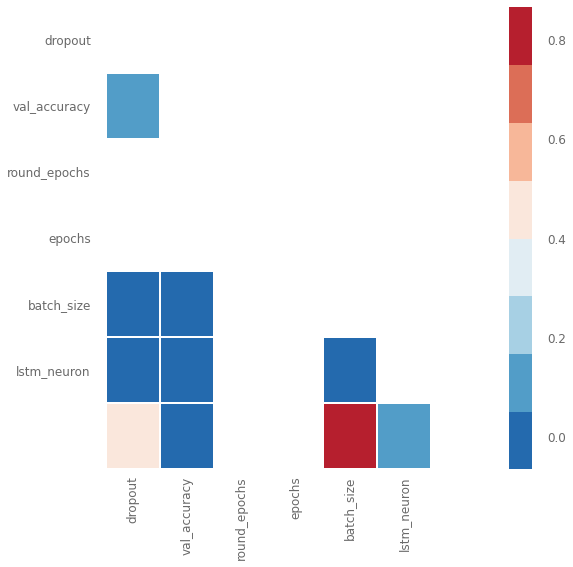

In [56]:
analyze_object.plot_corr('val_accuracy', ['accuracy', 'loss', 'val_loss'])

In [88]:
evaluate_object = talos.Evaluate(scan_results)
evaluate_object.evaluate(lstm_train_padded, y_lstm_train, folds=10, metric='val_accuracy', task='multi_label')

[0.995109803754991,
 0.9984493104841037,
 0.9959322060803928,
 0.9976339222403846,
 0.9961017480199066,
 0.9960196423373369,
 0.9967350400169608,
 0.9992263887396583,
 0.9976701277088383,
 0.9957772315159525]

In [89]:
talos.Deploy(scan_object=scan_results, model_name='lstm_deploy_2', metric='val_accuracy');

Deploy package lstm_deploy_2 have been saved.


In [90]:
!ls -al

total 21664
drwxr-xr-x 1 root root     4096 Jun 11 05:27  .
drwxr-xr-x 1 root root     4096 Jun 11 00:44  ..
drwxr-xr-x 1 root root     4096 Jun  8 16:15  .config
-rw-r--r-- 1 root root   537182 Jun 11 00:47  dw_customer_5000.csv
drwxr-xr-x 2 root root     4096 Jun 11 03:07  lstm_deploy
-rw-r--r-- 1 root root  1437849 Jun 11 05:27  lstm_deploy_2.zip
-rw-r--r-- 1 root root 20176860 Jun 11 03:04  lstm_deploy.zip
drwxr-xr-x 1 root root     4096 May 29 18:19  sample_data
drwxr-xr-x 2 root root     4096 Jun 11 04:40 'Tuning LSTM Model'


In [0]:
lstm_model = talos.Restore('lstm_deploy_2.zip')

In [77]:
lstm_predict = lstm_model.model.predict(lstm_test)

keras.engine.sequential.Sequential

In [70]:
lstm_model.params

{'batch_size': [32, 64],
 'dropout': [0.2, 0.3, 0.4],
 'epochs': [5],
 'lstm_neuron': [100, 200, 300],
 'optimizer': ['adam', 'sgd']}

In [106]:
predict_wordss = ['naufal ihsan pratama','jl juraganan rt 01 no 25','wanita','bahy helmi','vivin febriyanti','pejaten timur pasar minggu']

tokens = tokenizer.texts_to_sequences(predict_wordss)
pad_seq = sequence.pad_sequences(tokens, maxlen=max_seq_word)
result = lstm_model.model.predict(pad_seq)

labels = ['alamat','gender','nama','ttl']

for r in range(len(result)):
  print(predict_wordss[r], labels[np.argmax(result[r])])

naufal ihsan pratama nama
jl juraganan rt 01 no 25 alamat
wanita gender
bahy helmi nama
vivin febriyanti nama
pejaten timur pasar minggu alamat


In [81]:
result

array([[2.8729439e-05, 4.9471855e-06, 9.9997002e-01, 2.7930737e-04],
       [9.9998635e-01, 2.5629997e-06, 1.7881393e-07, 3.8430095e-04],
       [7.7188015e-05, 9.9998665e-01, 7.8916550e-05, 3.0398369e-06],
       [7.7593625e-03, 1.7642975e-03, 9.6139884e-01, 4.2617321e-05]],
      dtype=float32)

Download Models

In [102]:
from joblib import dump

downloads = [(count_vect,'count_vect.joblib'), (encoder,'encoder.joblib'), (mnb,'mnb.joblib')]

NameError: ignored

In [0]:
for obj,file_name in downloads:
  dump(obj, file_name)
  files.download(file_name)

In [0]:
from google.colab import files

files.download('lstm_deploy_2.zip')

In [103]:
dump(tokenizer,'tokenizer.joblib')

['tokenizer.joblib']

In [0]:
files.download('tokenizer.joblib')